In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import brewer2mpl

import matplotlib.cm as cm
import matplotlib as mpl


from matplotlib import rcParams

In [2]:
brewer2mpl.print_maps()


Sequential
Blues     :  {3, 4, 5, 6, 7, 8, 9}
BuGn      :  {3, 4, 5, 6, 7, 8, 9}
BuPu      :  {3, 4, 5, 6, 7, 8, 9}
GnBu      :  {3, 4, 5, 6, 7, 8, 9}
Greens    :  {3, 4, 5, 6, 7, 8, 9}
Greys     :  {3, 4, 5, 6, 7, 8, 9}
OrRd      :  {3, 4, 5, 6, 7, 8, 9}
Oranges   :  {3, 4, 5, 6, 7, 8, 9}
PuBu      :  {3, 4, 5, 6, 7, 8, 9}
PuBuGn    :  {3, 4, 5, 6, 7, 8, 9}
PuRd      :  {3, 4, 5, 6, 7, 8, 9}
Purples   :  {3, 4, 5, 6, 7, 8, 9}
RdPu      :  {3, 4, 5, 6, 7, 8, 9}
Reds      :  {3, 4, 5, 6, 7, 8, 9}
YlGn      :  {3, 4, 5, 6, 7, 8, 9}
YlGnBu    :  {3, 4, 5, 6, 7, 8, 9}
YlOrBr    :  {3, 4, 5, 6, 7, 8, 9}
YlOrRd    :  {3, 4, 5, 6, 7, 8, 9}
Diverging
BrBG      :  {3, 4, 5, 6, 7, 8, 9, 10, 11}
PRGn      :  {3, 4, 5, 6, 7, 8, 9, 10, 11}
PiYG      :  {3, 4, 5, 6, 7, 8, 9, 10, 11}
PuOr      :  {3, 4, 5, 6, 7, 8, 9, 10, 11}
RdBu      :  {3, 4, 5, 6, 7, 8, 9, 10, 11}
RdGy      :  {3, 4, 5, 6, 7, 8, 9, 10, 11}
RdYlBu    :  {3, 4, 5, 6, 7, 8, 9, 10, 11}
RdYlGn    :  {3, 4, 5, 6, 7, 8, 9, 10, 11}
Spect

In [3]:
dark_cmap = brewer2mpl.get_map('Dark2','Qualitative',6)
# dark_cmap.colorbrewer2()

In [4]:
dark2_colors=dark_cmap.mpl_colors

In [5]:
rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

/Users/anshu/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:
states_abbrev = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}
abbrev_states_dict = {v: k for k, v in states_abbrev.items()}

In [7]:
import json
from collections import defaultdict
state2poly = defaultdict(list)
data = json.load(file('data/us-states.json'))
for f in data['features']:
    state = states_abbrev[f['id']]
#     print state
    geo = f['geometry']
    if geo['type'] == 'Polygon':
        for coords in geo['coordinates']:
            state2poly[state].append(coords)
    elif geo['type'] == 'MultiPolygon':
        for polygon in geo['coordinates']:
            state2poly[state].extend(polygon)
        




In [8]:
def draw_state(plot, stateid, **kwargs):
    """
    draw_state(plot, stateid, color=..., **kwargs)
    
    Automatically draws a filled shape representing the state in
    subplot.
    The color keyword argument specifies the fill color.  It accepts keyword
    arguments that plot() accepts
    """
    for polygon in state2poly[stateid]:
#         print polygon
        xs, ys = zip(*polygon)
        plot.fill(xs, ys, **kwargs)

In [9]:
def make_map(states, label):
    """
    Draw a cloropleth map, that maps data onto the United States
    
    Inputs
    -------
    states : Column of a DataFrame
        The value for each state, to display on a map
    label : str
        Label of the color bar

    Returns
    --------
    The map
    """
    fig = plt.figure(figsize=(12, 9))
    ax = plt.gca()

    if states.max() < 2: # colormap for election probabilities 
        cmap = cm.RdBu
        vmin, vmax = 0, 1
    else:  # colormap for electoral votes
        cmap = cm.binary
        vmin, vmax = 0, states.max()
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    
    skip = set(['National', 'District of Columbia', 'Guam', 'Puerto Rico',
                'Virgin Islands', 'American Samoa', 'Northern Mariana Islands'])
    for state in states_abbrev.values():
#         print state
        if state in skip:
            continue
        color = cmap(norm(states.loc[state]))
        draw_state(ax, state, color = color, ec='k')

    #add an inset colorbar
    ax1 = fig.add_axes([0.45, 0.70, 0.4, 0.02])    
    cb1=mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                  norm=norm,
                                  orientation='horizontal')
    ax1.set_title(label)
    remove_border(ax, left=False, bottom=False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-180, -60)
    ax.set_ylim(15, 75)
    return ax

In [10]:
import datetime
today = datetime.datetime(2012, 10, 2)
today


datetime.datetime(2012, 10, 2, 0, 0)

In [11]:
electoral_votes = pd.read_csv("data/electoral_votes.csv").set_index('State')
print electoral_votes.head()
# print electoral_votes.count()
# sum =0
# for k,v in states_abbrev.items():
#     sum+=1
# print sum

# print electoral_votes.Votes


            Votes
State            
California     55
Texas          38
New York       29
Florida        29
Illinois       20


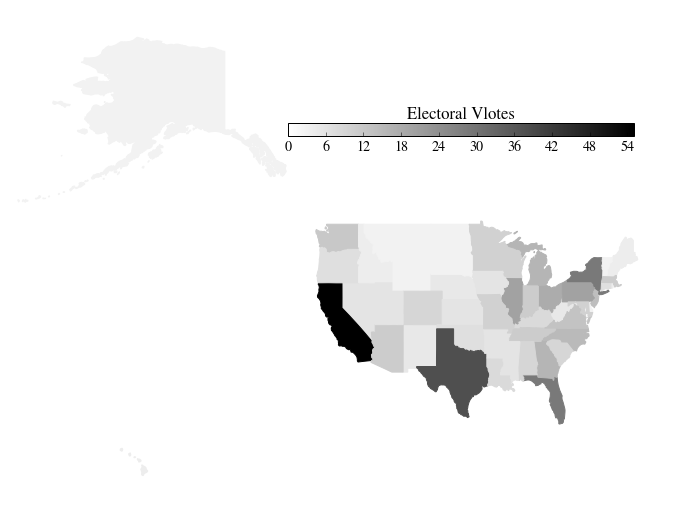

In [12]:
make_map(electoral_votes.Votes, "Electoral Vlotes");

In [13]:
predictwise = pd.read_csv('data/predictwise.csv').set_index('States')

In [14]:
predictwise.head()

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55


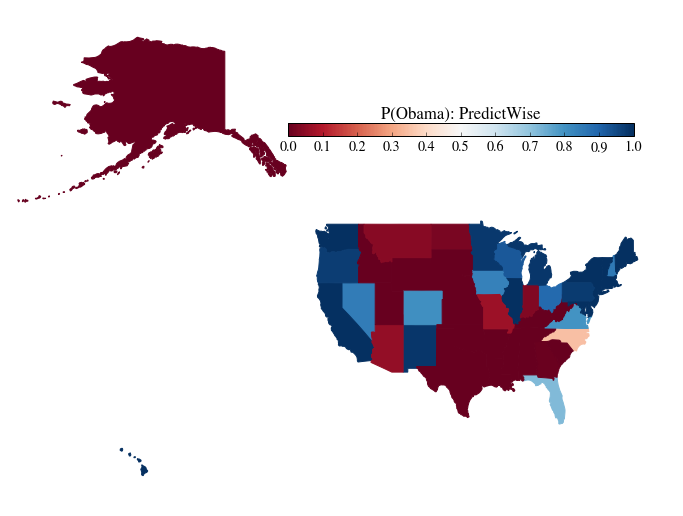

In [15]:
make_map(predictwise.Obama, "P(Obama): PredictWise")

In [16]:
def simulate_election(model,n_sim):
    result =[]
    for j in range(51):
        a= np.random.binomial(1,model.iloc[j,0],n_sim)*model.iloc[j,1]
        result.append(a)
    result = np.sum(result,axis=0)
    return result
    

In [17]:
def simulate_election2(model, n_sim):
    #each column simulates a single outcome from the 50 states + DC
    #Obama wins the simulation if the random number is < the win probability
    simulations = np.random.uniform(size=(51, n_sim))
#     print simulations
    obama_votes = (simulations < model.Obama.values.reshape(-1, 1)) * model.Votes.values.reshape(-1, 1)
#     print obama_votes
    #summing over rows gives the total electoral votes for each simulation
    return obama_votes.sum(axis=0)

In [18]:
result = simulate_election(predictwise.loc[:,['Obama','Votes']], 10000)

In [19]:
print result

[ 320.  303.  326. ...,  347.  334.  326.]


In [20]:
print(result>269).mean()

0.9948


In [28]:
def plot_simulation(simulation):
    plt.hist(simulation, bins=200, 
             label='simulations', align='left', normed=True)
    plt.axvline(332, 0, .5, color='r', label='Actual Outcome')
    plt.axvline(269, 0, .5, color='k', label='Victory Threshold')
    p05 = np.percentile(simulation, 5.)
    p95 = np.percentile(simulation, 95.)
    iq = int(p95 - p05)
    pwin = ((simulation >= 269).mean() * 100)
    plt.title("Chance of Obama Victory: %0.2f%%, Spread: %d votes" % (pwin, iq))
    plt.legend(frameon=False, loc='upper left')
    plt.xlabel("Obama Electoral College Votes")
    plt.ylabel("Probability")
    remove_border()
    

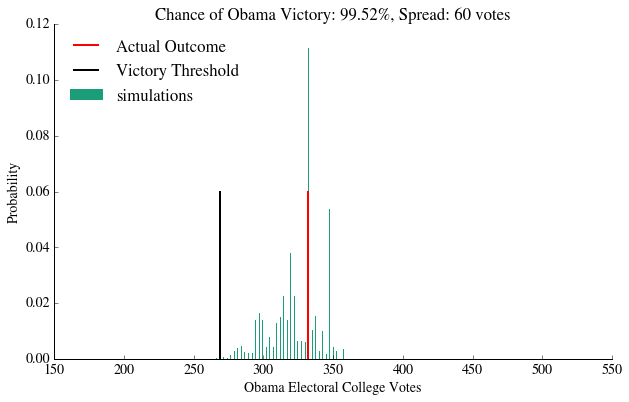

In [29]:
plot_simulation2(result)

In [30]:
gallup_2012=pd.read_csv("data/g12.csv").set_index('State')
gallup_2012["Unknown"] = 100 - gallup_2012.Democrat - gallup_2012.Republican


In [31]:
gallup_2012.head()

,Democrat,Republican,Dem_Adv,N,Unknown
State,,,,,
Alabama,36.0,49.6,-13.6,3197,14.4
Alaska,35.9,44.3,-8.4,402,19.8
Arizona,39.8,47.3,-7.5,4325,12.9
Arkansas,41.5,40.8,0.7,2071,17.7
California,48.3,34.6,13.7,16197,17.1


In [32]:
def simple_gallup_model(gallup):
    a=[]
    for i in gallup.Dem_Adv:
        if(i>0):
            a.append(1)
        else:
            a.append(0)
    result = pd.DataFrame(a,columns={'Obama'},index=gallup.index)
    return result
#     return pd.DataFrame(dict(Obama=(gallup.Dem_Adv > 0).astype(float)))

In [33]:
def plot_simulation2(simulation):    
    plt.hist(simulation, bins=np.arange(200, 538, 1), 
             label='simulations', align='left', normed=True)
    plt.axvline(332, 0, .5, color='r', label='Actual Outcome')
    plt.axvline(269, 0, .5, color='k', label='Victory Threshold')
    p05 = np.percentile(simulation, 5.)
    p95 = np.percentile(simulation, 95.)
    iq = int(p95 - p05)
    pwin = ((simulation >= 269).mean() * 100)
    plt.title("Chance of Obama Victory: %0.2f%%, Spread: %d votes" % (pwin, iq))
    plt.legend(frameon=False, loc='upper left')
    plt.xlabel("Obama Electoral College Votes")
    plt.ylabel("Probability")
    remove_border()

[334 334 334 ..., 334 334 334]


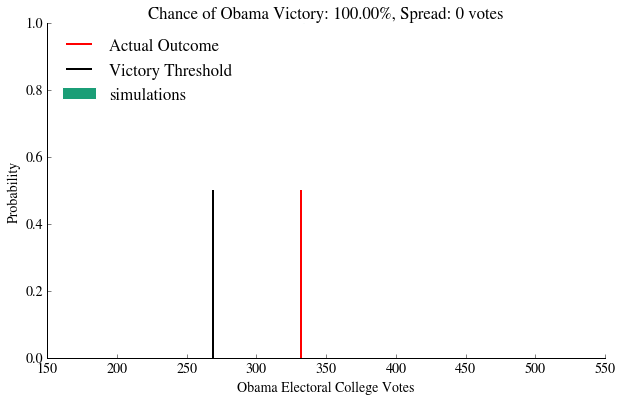

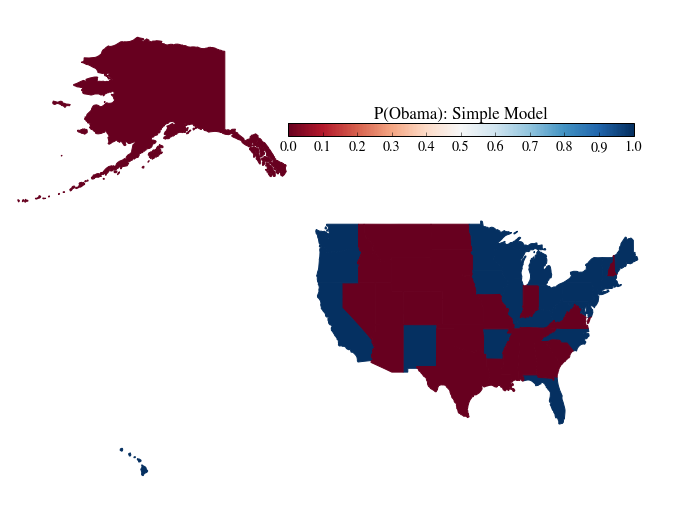

In [34]:
model = simple_gallup_model(gallup_2012)
model = model.join(electoral_votes)
prediction = (simulate_election(model,10000))
print prediction
plot_simulation2(prediction)

plt.show()
make_map(model.Obama, "P(Obama): Simple Model")

In [35]:

from scipy.special import erf
def uncertain_gallup_model(gallup):
    sigma = 3
    prob =  .5 * (1 + erf(gallup.Dem_Adv / np.sqrt(2 * sigma**2)))
    return pd.DataFrame(dict(Obama=prob), index=gallup.index)

In [36]:
model = uncertain_gallup_model(gallup_2012)
model = model.join(electoral_votes)

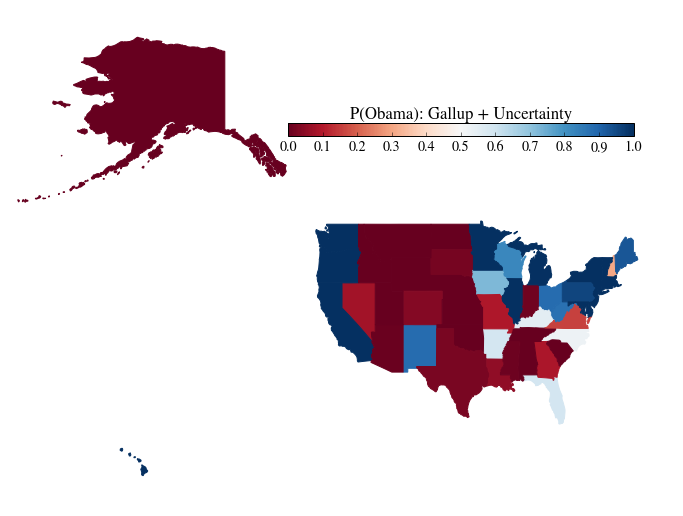

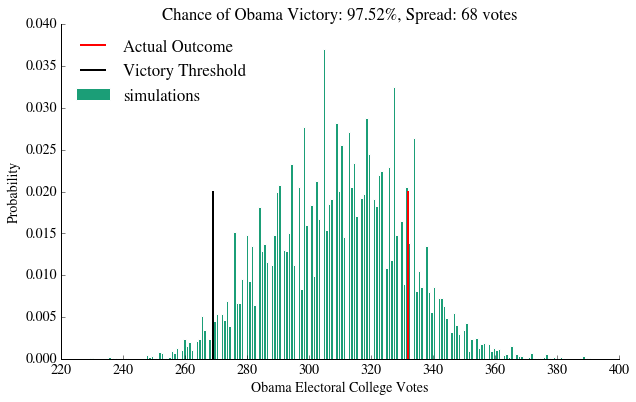

In [37]:
make_map(model.Obama, "P(Obama): Gallup + Uncertainty")
plt.show()
prediction = simulate_election(model, 10000)
plot_simulation(prediction)

In [38]:
def biased_gallup_poll(gallup,bias):
    g2 = gallup.copy()
    g2.Dem_Adv-=bias
    return uncertain_gallup_model(g2)
    

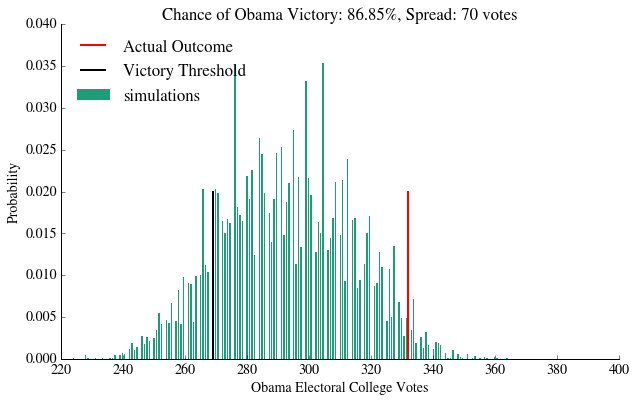

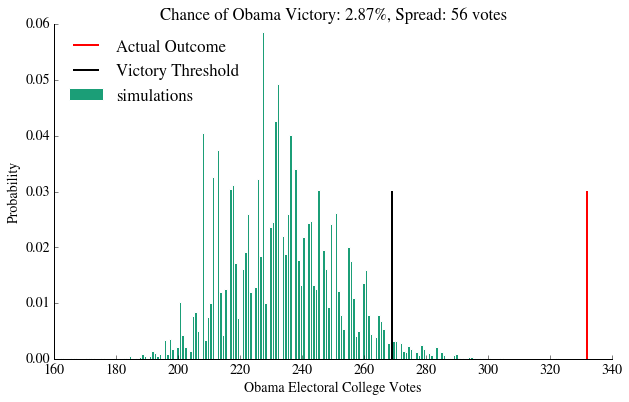

In [39]:
model = biased_gallup_poll(gallup_2012, 1)
model=model.join(electoral_votes)
prediction=simulate_election(model,10000)
plot_simulation(prediction)
plt.show()

model = biased_gallup_poll(gallup_2012, 5)
model = model.join(electoral_votes)
prediction = simulate_election(model, 10000)
plot_simulation(prediction)
plt.show()


In [40]:
gallup_08 = pd.read_csv("data/g08.csv").set_index('State')
results_08 = pd.read_csv('data/2008results.csv').set_index('State')

prediction_08 = gallup_08[['Dem_Adv']]
prediction_08['Dem_Win']=results_08["Obama Pct"] - results_08["McCain Pct"]
prediction_08.head()

/Users/anshu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Dem_Adv,Dem_Win
State,,
Alabama,-0.8,-21.58
Alaska,-10.6,-21.53
Arizona,-0.4,-8.52
Arkansas,12.5,-19.86
California,19.4,24.06


[  1.26390486 -11.32855786]


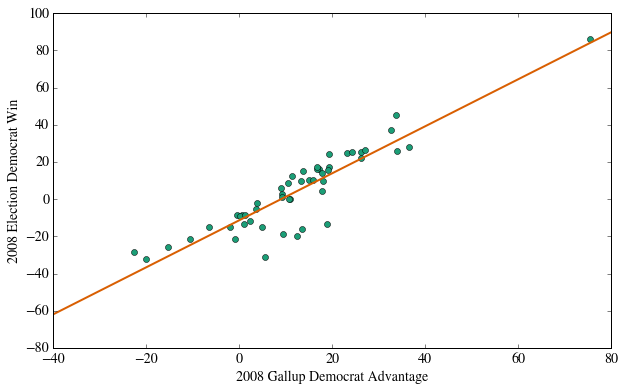

In [41]:
plt.plot(prediction_08.Dem_Adv,prediction_08.Dem_Win,'o')
plt.xlabel("2008 Gallup Democrat Advantage")
plt.ylabel("2008 Election Democrat Win")
fit = np.polyfit(prediction_08.Dem_Adv, prediction_08.Dem_Win, 1)
x = np.linspace(-40, 80, 10)
y = np.polyval(fit, x)
plt.plot(x, y)
print fit

In [42]:
prediction_08[(prediction_08.Dem_Adv>0)&(prediction_08.Dem_Win<0)]

,Dem_Adv,Dem_Win
State,,
Arkansas,12.5,-19.86
Georgia,3.6,-5.21
Kentucky,13.5,-16.23
Louisiana,9.4,-18.63
Mississippi,1.1,-13.18
Missouri,10.9,-0.14
Montana,3.9,-2.26
North Dakota,0.6,-8.63
Oklahoma,5.6,-31.30


In [43]:
print (prediction_08.Dem_Adv - prediction_08.Dem_Win).mean()

8.06803921569


                   Obama  Votes
State                          
Alabama     2.549072e-13      9
Alaska      2.017119e-08      3
Arizona     1.055167e-07     11
Arkansas    7.024402e-03      6
California  9.697629e-01     55
[191 179 198 ..., 208 185 206]


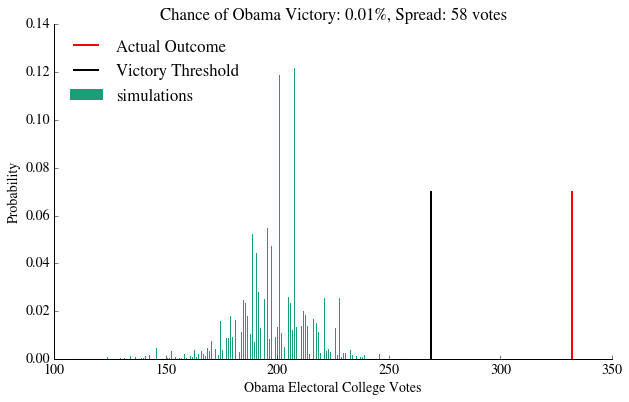

In [44]:
model = biased_gallup_poll(gallup_2012,8.06803921569)
model = model.join(electoral_votes)
prediction = simulate_election2(model, 10000)
print model.head()
print prediction
plot_simulation(prediction)

In [45]:
national_results=pd.read_csv("data/nat.csv")
national_results.set_index('Year',inplace=True)
national_results.head()

,Dem,Rep
Year,,
2004,48,51
2008,53,46
2012,51,47


In [46]:
polls04=pd.read_csv("data/p04.csv")
polls04.State=polls04.State.replace(states_abbrev)
polls04.set_index("State", inplace=True);
polls04.head()

,Dem,Rep
State,,
Alabama,37,63
Alaska,34,62
Arizona,44,55
Arkansas,45,54
California,54,45


In [47]:
pvi08=polls04.Dem - polls04.Rep - (national_results.loc[2004,'Dem'] - national_results.loc[2004,'Rep'])
pvi08.head()

State
Alabama      -23
Alaska       -25
Arizona       -8
Arkansas      -6
California    12
dtype: int64

In [48]:
prediction_08.head()


,Dem_Adv,Dem_Win
State,,
Alabama,-0.8,-21.58
Alaska,-10.6,-21.53
Arizona,-0.4,-8.52
Arkansas,12.5,-19.86
California,19.4,24.06


In [49]:
results_08.head()

,Obama,McCain,Nader,Barr,Baldwin,McKinney,Others,Total,Unnamed: 9,Obama Pct,McCain Pct,O Rounded,M Rounded
State,,,,,,,,,,,,,
Alabama,"813,479","1,266,546","6,788","4,991","4,310",0,"3,705","2,099,819",NaN,38.74,60.32,39,60
Alaska,"123,594","193,841","3,783","1,589","1,660",0,"1,730","326,197",NaN,37.89,59.42,38,59
Arizona,"1,034,707","1,230,111","11,301","12,555","1,371","3,406",24,"2,293,475",NaN,45.12,53.64,45,54
Arkansas,"422,310","638,017","12,882","4,776","4,023","3,470","1,139","1,086,617",NaN,38.86,58.72,39,59
California,"8,274,473","5,011,781","108,381","67,582","3,145","38,774","57,764","13,561,900",NaN,61.01,36.95,61,37


In [50]:
e2008 = pd.DataFrame({'pvi':pvi08,'Dem_Adv':prediction_08.Dem_Adv-prediction_08.Dem_Adv.mean(),'Dem_Win':prediction_08.Dem_Win})
e2008['obama_win']=1*(prediction_08.Dem_Win > 0)
e2008 = e2008.sort_index()


In [51]:
e2008.head()


,Dem_Adv,Dem_Win,pvi,obama_win
State,,,,
Alabama,-13.154902,-21.58,-23,0
Alaska,-22.954902,-21.53,-25,0
Arizona,-12.754902,-8.52,-8,0
Arkansas,0.145098,-19.86,-6,0
California,7.045098,24.06,12,1


In [52]:
pvi12 = e2008.Dem_Win - (national_results.xs(2008)['Dem'] - national_results.xs(2008)['Rep'])
e2012 = pd.DataFrame(dict(pvi=pvi12, Dem_Adv=gallup_2012.Dem_Adv - gallup_2012.Dem_Adv.mean()))
e2012 = e2012.sort_index()
e2012.head()

,Dem_Adv,pvi
State,,
Alabama,-14.684314,-28.58
Alaska,-9.484314,-28.53
Arizona,-8.584314,-15.52
Arkansas,-0.384314,-26.86
California,12.615686,17.06


In [53]:
results2012 = pd.read_csv("data/2012results.csv")
results2012.set_index("State", inplace=True)
results2012 = results2012.sort_index()
results2012.head()

,Winner
State,
Alabama,0
Alaska,0
Arizona,0
Arkansas,0
California,1


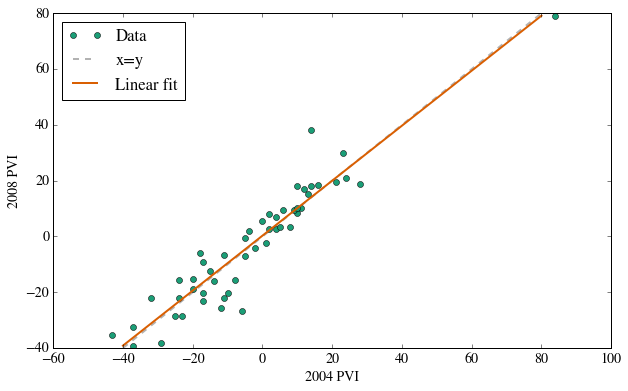

In [54]:
ax=plt.gca()
ax.plot(e2008.pvi,e2012.pvi,'o',label="Data")
fit = np.polyfit(e2008.pvi,e2012.pvi,1)
x= np.linspace(-40,80,10)
y=np.polyval(fit,x)
ax.plot(x, x, '--k', alpha=.3, label='x=y')
ax.plot(x, y, label='Linear fit')
plt.xlabel("2004 PVI")
plt.ylabel("2008 PVI")
plt.legend(loc='upper left')


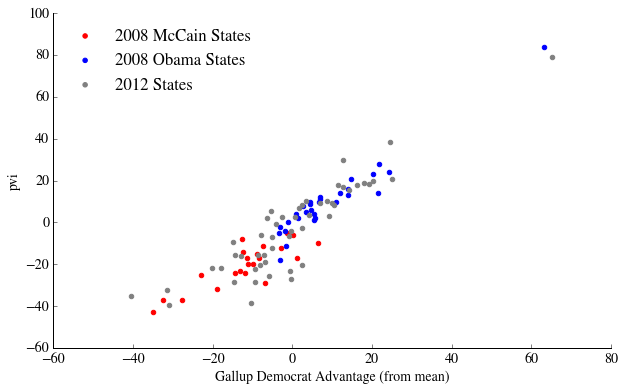

In [55]:
plt.xlabel("Gallup Democrat Advantage (from mean)")
plt.ylabel("pvi")
colors=["red","blue"]
ax=plt.gca()
ax.scatter(e2008[e2008['obama_win']==0].Dem_Adv,e2008[e2008['obama_win']==0].pvi,color=colors[0],label='2008 McCain States')
ax.scatter(e2008[e2008['obama_win']==1].Dem_Adv,e2008[e2008['obama_win']==1].pvi,color=colors[1],label='2008 Obama States')
ax.scatter(e2012.Dem_Adv,e2012.pvi,color='gray',label='2012 States')
plt.legend(frameon=False, scatterpoints=1, loc='upper left')
remove_border()

In [56]:
from sklearn.linear_model import LogisticRegression

def prepare_features(frame2008, featureslist):
    y= frame2008.obama_win.values
    X = frame2008[featureslist].values
    if len(X.shape) == 1:
        X = X.reshape(-1, 1)
    return y, X

In [57]:
def fit_logistic(frame2008, frame2012, featureslist, reg=0.0001):
    y, X = prepare_features(frame2008, featureslist)
    clf2 = LogisticRegression(C=reg)
    clf2.fit(X, y)
    X_new = frame2012[featureslist]
    obama_probs = clf2.predict_proba(X_new)[:, 1]
    
    df = pd.DataFrame(index=frame2012.index)
    df['Obama'] = obama_probs
    return df, clf2

In [58]:
from sklearn.grid_search import GridSearchCV

def cv_optimize(frame2008, featureslist, n_folds=10, num_p=100):
    y, X = prepare_features(frame2008, featureslist)
    clf = LogisticRegression()
    parameters = {"C": np.logspace(-4, 3, num=num_p)}
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X, y)
    return gs.best_params_, gs.best_score_

In [59]:
def cv_and_fit(frame2008, frame2012, featureslist, n_folds=5):
    bp, bs = cv_optimize(frame2008, featureslist, n_folds=n_folds)
    predict, clf = fit_logistic(frame2008, frame2012, featureslist, reg=bp['C'])
    return predict, clf

In [60]:
res,clf = cv_and_fit(e2008,e2012,['Dem_Adv','pvi'])
predict2012_logistic = res.join(electoral_votes)
predict2012_logistic.head()

,Obama,Votes
State,,
Alabama,0.004367,9
Alaska,0.008462,3
Arizona,0.068250,11
Arkansas,0.033851,6
California,0.994326,55


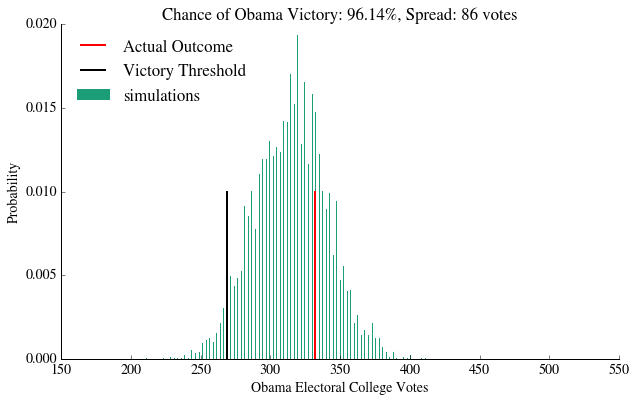

In [61]:
prediction=simulate_election(predict2012_logistic,10000)
plot_simulation2(prediction)

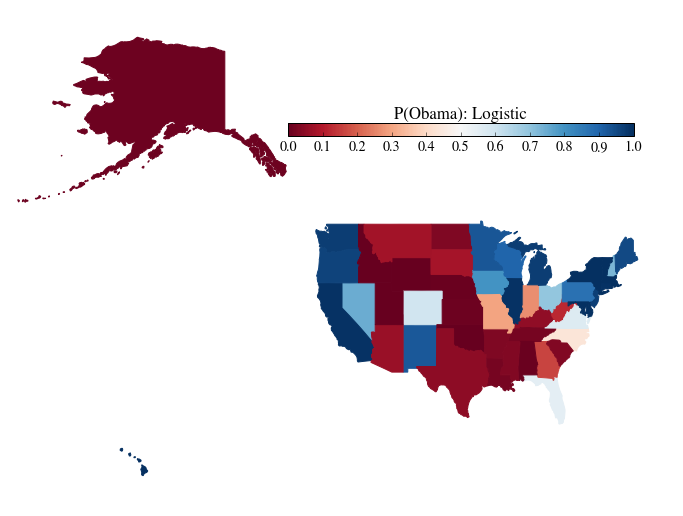

In [62]:
make_map(predict2012_logistic.Obama, "P(Obama): Logistic")

In [63]:
from matplotlib.colors import ListedColormap
def points_plot(e2008, e2012, clf):
    """
    e2008: The e2008 data
    e2012: The e2012 data
    clf: classifier
    """
    Xtrain = e2008[['Dem_Adv', 'pvi']].values
    Xtest = e2012[['Dem_Adv', 'pvi']].values
    ytrain = e2008['obama_win'].values == 1
    
    X=np.concatenate((Xtrain, Xtest))
    
    # evenly sampled points
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    #plot background colors
    ax = plt.gca()
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap='RdBu', alpha=.5)
    cs2 = ax.contour(xx, yy, Z, cmap='RdBu', alpha=.5)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14)
    
    # Plot the 2008 points
    ax.plot(Xtrain[ytrain == 0, 0], Xtrain[ytrain == 0, 1], 'ro', label='2008 McCain')
    ax.plot(Xtrain[ytrain == 1, 0], Xtrain[ytrain == 1, 1], 'bo', label='2008 Obama')
        
    # and the 2012 points
    ax.scatter(Xtest[:, 0], Xtest[:, 1], c='k', marker="s", s=50, facecolors="k", alpha=.5, label='2012')
    plt.legend(loc='upper left', scatterpoints=1, numpoints=1)

    return ax

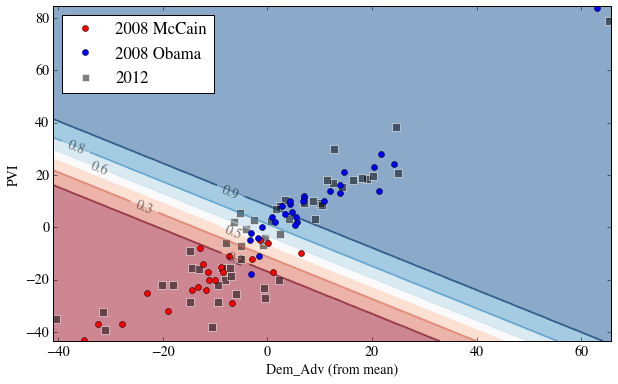

In [64]:
points_plot(e2008, e2012, clf)
plt.xlabel("Dem_Adv (from mean)")
plt.ylabel("PVI")

In [71]:
multipoll = pd.read_csv('data/cleaned-state_data2012.csv', index_col=0)

#convert state abbreviation to full name
multipoll.State.replace(states_abbrev, inplace=True)

#convert dates from strings to date objects, and compute midpoint
multipoll.start_date = pd.to_datetime(multipoll.start_date)
multipoll.end_date = pd.to_datetime(multipoll.end_date)


multipoll['poll_date'] = multipoll.start_date + (multipoll.end_date - multipoll.start_date).values / 2

#compute the poll age relative to Oct 2, in days
multipoll['age_days'] = (today - multipoll['poll_date']).values / np.timedelta64(1, 'D')

#drop any rows with data from after oct 2
multipoll = multipoll[multipoll.age_days > 0]

#drop unneeded columns
multipoll = multipoll.drop(['Date', 'start_date', 'end_date', 'Spread'], axis=1)

#add electoral vote counts
multipoll = multipoll.join(electoral_votes, on='State')

#drop rows with missing data
multipoll.dropna()

multipoll.head()


,Pollster,State,MoE,Obama (D),Romney (R),Sample,obama_spread,poll_date,age_days,Votes
0,Rasmussen Reports,Washington,4.5,52.0,41.0,500.0,11.0,2012-09-26 00:00:00,6.0,12
1,Gravis Marketing,Washington,4.6,56.0,39.0,625.0,17.0,2012-09-21 12:00:00,10.5,12
2,Elway Poll,Washington,5.0,53.0,36.0,405.0,17.0,2012-09-10 12:00:00,21.5,12
3,SurveyUSA,Washington,4.4,54.0,38.0,524.0,16.0,2012-09-08 00:00:00,24.0,12
4,SurveyUSA,Washington,4.4,54.0,37.0,524.0,17.0,2012-08-01 12:00:00,61.5,12


In [108]:
len(multipoll[multipoll.State=='Arizona']['obama_spread'])

20

In [113]:
def state_average(multipoll):
    a=multipoll.groupby('State')
    N = a.size()
    poll_mean=a.obama_spread.mean()
    poll_std = a.obama_spread.std()
    poll_std[poll_std.isnull()] = 0.05*poll_mean[poll_std.isnull()]
    b = pd.DataFrame({'N':N,'poll_mean':poll_mean,'poll_std':poll_std})
    
    return b

In [118]:
avg = state_average(multipoll).join(electoral_votes, how='outer')
avg.head(60)

,N,poll_mean,poll_std,Votes
State,,,,
Alabama,NaN,NaN,NaN,9
Alaska,NaN,NaN,NaN,3
Arizona,20.0,-5.500000,4.559548,11
Arkansas,3.0,-20.333333,4.041452,6
California,20.0,18.950000,5.548589,55
Colorado,29.0,2.931034,3.390439,9
Connecticut,10.0,11.300000,5.292552,7
Delaware,NaN,NaN,NaN,3
District of Columbia,NaN,NaN,NaN,3


In [123]:
def default_missing(results):
    red_states = ["Alabama", "Alaska", "Arkansas", "Idaho", "Wyoming"]
    blue_states = ["Delaware", "District of Columbia", "Hawaii"]
    results.ix[red_states, ["poll_mean"]] = -100.0
    results.ix[red_states, ["poll_std"]] = 0.1
    results.ix[blue_states, ["poll_mean"]] = 100.0
    results.ix[blue_states, ["poll_std"]] = 0.1
default_missing(avg)
avg.head()

,N,poll_mean,poll_std,Votes
State,,,,
Alabama,NaN,-100.00,0.100000,9
Alaska,NaN,-100.00,0.100000,3
Arizona,20.0,-5.50,4.559548,11
Arkansas,3.0,-100.00,0.100000,6
California,20.0,18.95,5.548589,55


In [124]:
def aggregated_poll_model(polls):
    sigma = polls.poll_std
    prob =  .5 * (1 + erf(polls.poll_mean / np.sqrt(2 * sigma ** 2)))
    return pd.DataFrame(dict(Obama=prob, Votes=polls.Votes))

(250, 400)

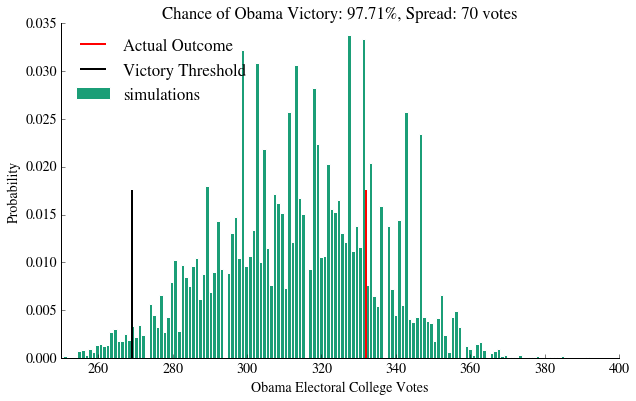

In [127]:
model = aggregated_poll_model(avg)
sims = simulate_election2(model, 10000)
plot_simulation(sims)
plt.xlim(250, 400)

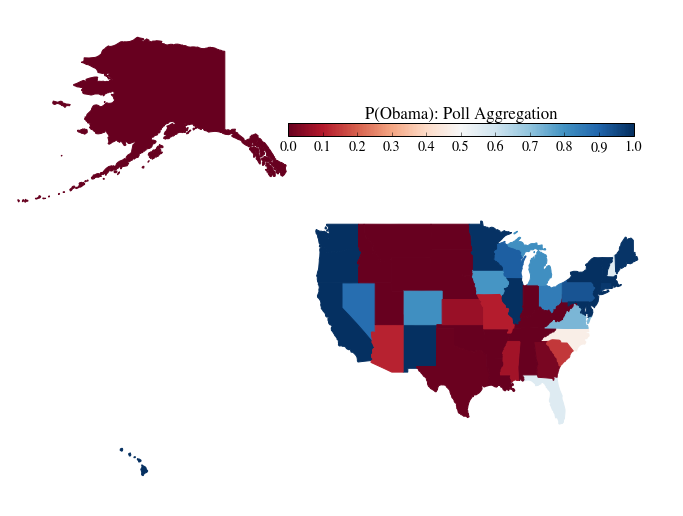

In [128]:
make_map(model.Obama, "P(Obama): Poll Aggregation")

In [129]:
def weights(df):
    lam_age = .5 ** (df.age_days / 30.)
    w = lam_age / df.MoE ** 2
    return w

def wmean(df):
    w = weights(df)
    result = (df.obama_spread * w).sum() / w.sum()
    return result

def wsig(df):
    return df.obama_spread.std()

def weighted_state_average(multipoll):
        
    groups = multipoll.groupby('State')
    poll_mean = groups.apply(wmean)
    poll_std = groups.apply(wsig)
    poll_std[poll_std.isnull()] = poll_mean[poll_std.isnull()] * .05
    
    return pd.DataFrame(dict(poll_mean = poll_mean, poll_std = poll_std))

(250, 400)

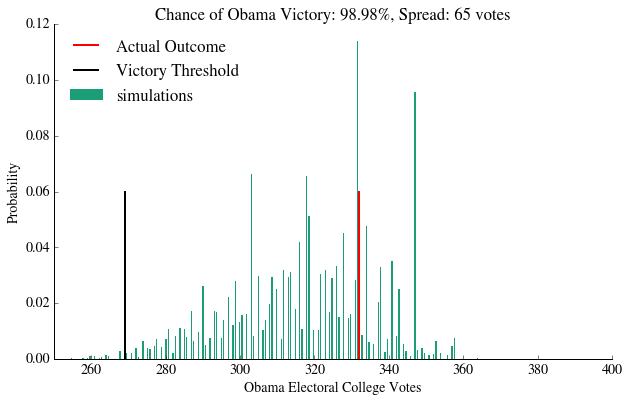

In [131]:
average = weighted_state_average(multipoll)
average = average.join(electoral_votes, how='outer')
default_missing(average)
model = aggregated_poll_model(average)
sims = simulate_election2(model, 10000)
plot_simulation(sims)
plt.xlim(250, 400)